In [ ]:
# 如何设定初始点或初始种群
# 对于遗传算法 GA, 运行 ga=GA(**params) 生成模型后，赋值设定初始种群，例如 ga.Chrom = np.random.randint(0,2,size=(80,20))
# 对于差分进化算法 DE，设定 de.X 为初始 X.
# 对于模拟退火算法 SA，入参 x0 就是初始点.
# 对于粒子群算法 PSO，手动赋值 pso.X 为初始 X, 然后执行 pso.cal_y(); pso.update_gbest(); pso.update_pbest() 来更新历史最优点

In [25]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

In [26]:
num_points = 50
points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


In [27]:
# 4. 模拟退火算法
# (SA, Simulated Annealing)

# 4.1 模拟退火算法用于多元函数优化
# 第一步：定义问题
# -> Demo code: examples/demo_sa.py#s1

demo_func = lambda x: x[0] ** 2 + (x[1] - 0.05) ** 2 + x[2] ** 2
# 第二步，运行模拟退火算法
# -> Demo code: examples/demo_sa.py#s2

from sko.SA import SA

sa = SA(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, L=300, max_stay_counter=150)
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y', best_y)
sa



best_x: [ 7.41663409e-06  4.99928058e-02 -2.81976767e-06] best_y 1.1471368723236944e-10


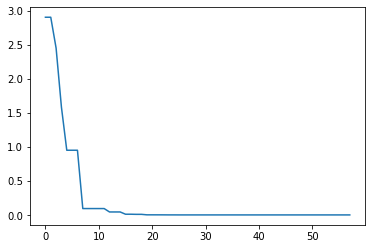

In [28]:
# 第三步，画出结果 -> Demo code: examples/demo_sa.py#s3

import matplotlib.pyplot as plt
import pandas as pd

plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

In [29]:

# 另外，scikit-opt 还提供了三种模拟退火流派: Fast, Boltzmann, Cauchy. 更多参见 more sa

# 4.2 模拟退火算法解决TSP问题（旅行商问题）
# 第一步，定义问题。（我猜你已经无聊了，所以不黏贴这一步了）

# 第二步，调用模拟退火算法
# -> Demo code: examples/demo_sa_tsp.py#s2

from sko.SA import SA_TSP

sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=100, T_min=1, L=10 * num_points)

best_points, best_distance = sa_tsp.run()
print(best_points, best_distance, cal_total_distance(best_points))
# 第三步，画出结果 -> Demo code: examples/demo_sa_tsp.py#s3



[35 13 15 37 29  5 48 40  4 16 47 46 24 30 25  1 42 38 17 44  2  8 45 22
 34  0 31 12 20 39 10 18 41 43  7 32  9  3 28 26 14 21 36 33  6 49 11 19
 23 27] 19.09323793231106 19.09323793231106


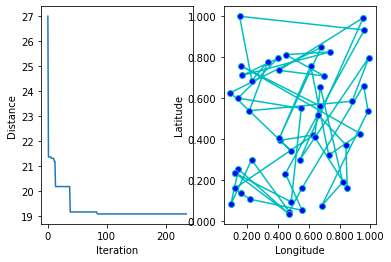

In [30]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 2)

best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(sa_tsp.best_y_history)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Distance")
ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.show()
sa
